# Production Budget vs. Profit Margin #

For Microsoft to break into the film industry, something they'll need to know is how much they should be spending on a given film in order to turn the best possible profit.

While multiple factors will ultimately go into what determines a profit and profit margin, below we will explore the correlation between a budget and profit margin.

The minimum we expect to answer is:

## 1. What is the correlation between Budget and Profit Margin (ROI)? ##


## 2. What should Microsoft's film budget be? ##

We will explore this question using the data set from the-numbers.com, a Los Angeles based database that tracks the budgets and gross profits of motion pictures.

## Importing Relevant Python Libraries and The Numbers Dataset ##

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings

In [6]:
df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col='id')
print(f"""The first movie in the data set was released in {df['release_date'].min()}\nwhile the most recent was released in {df['release_date'].max()}""")

The first movie in the data set was released in Apr 1, 1975
while the most recent was released in Sep 9, 2016


In [7]:
# A sample of the dataframe
df.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
63,"May 28, 2010",Prince of Persia: Sands of Time,"$200,000,000","$90,759,676","$336,359,676"
82,"May 21, 2010",Perrierâs Bounty,"$6,600,000",$828,$828
51,"Oct 13, 2000",Just Looking,"$3,000,000","$39,852","$39,852"


## Data Cleaning and Organization ##

Here we will clean and organize the data with our first filter.

We will first remove any "zero" values from the worldwide_gross column.

Then we will add three columns:

1. Profit: This is the gross minus the budget


2. Profit Margin: Our profit margin column.
    
    a. Calculated by dividing the profit by the gross and multiplying by 100 to get a percentage.


3. Release Year: What year did it come out.
    
    a. We will use our first filter to take out anything made before 2005.

In [8]:
# Cleaning up the value columns
df['production_budget'] = df['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['domestic_gross'] = df['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
# Dropping all "0" values from the worldwide_gross column
df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)
warnings.filterwarnings('ignore')
df = df.dropna()

In [62]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['prof_margin'] = round(((df['profit']/df['worldwide_gross']) * 100), 2)
# We're using the below function to isolate the release year from the release date
df['release_year'] = df['release_date'].map(lambda x: int(x[-4:]))
df['roi'] = round(((df['profit']/df['production_budget']) * 100), 2)

In [63]:
# Anything older than the year 2005 will be removed, so we have a 10 year scope, using the last decade.
filtered_df = df[df['release_year'] >= 2005]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 1 to 82
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3070 non-null   object 
 1   movie              3070 non-null   object 
 2   production_budget  3070 non-null   float64
 3   domestic_gross     3070 non-null   float64
 4   worldwide_gross    3070 non-null   float64
 5   profit             3070 non-null   float64
 6   prof_margin        3070 non-null   float64
 7   release_year       3070 non-null   int64  
 8   roi                3070 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 239.8+ KB


In [11]:
# Removing anything with a negative profit margin as we are looking for the average profitable films.
# Negative profit margins don't do our dataset any good
filtered_df = filtered_df[filtered_df['prof_margin'] >= 0]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2062 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2062 non-null   object 
 1   movie              2062 non-null   object 
 2   production_budget  2062 non-null   float64
 3   domestic_gross     2062 non-null   float64
 4   worldwide_gross    2062 non-null   float64
 5   profit             2062 non-null   float64
 6   prof_margin        2062 non-null   float64
 7   release_year       2062 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 145.0+ KB


## Inspecting the Data ##

In [12]:
lowest_film = df[(df['production_budget'] == df['production_budget'].min())]
highest_film = df[(df['production_budget'] == df['production_budget'].max())]
df_range = [int(filtered_df['production_budget'].min()),int(filtered_df['production_budget'].max())]
display(lowest_film, highest_film, df_range)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,prof_margin,release_year
id,,,,,,,,
82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,179941.0,99.39,2005


,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,prof_margin,release_year
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,84.69,2009


[1100, 425000000]

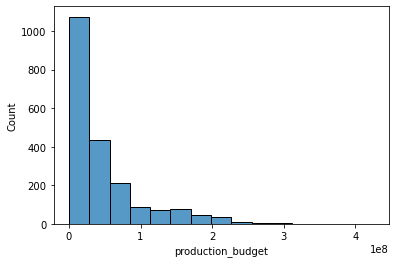

In [13]:
sns.histplot(data=filtered_df, x='production_budget',bins=15);

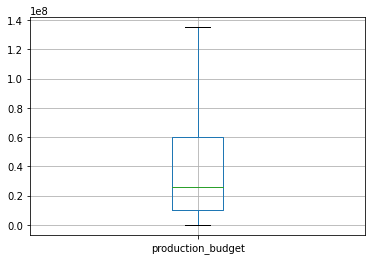

In [14]:
filtered_df.boxplot('production_budget', showfliers=False);

plt.savefig('images/filtered_df_boxplot')

In [15]:
filt_25_percentile = filtered_df['production_budget'].quantile(.25)
filt_75_percentile = filtered_df['production_budget'].quantile(.75)
print(f"""Because of the heavy skew, we will divide our data using IQR.\n\nThe 25th percentile is {filt_25_percentile} and the 75th is {filt_75_percentile}.""")

Because of the heavy skew, we will divide our data using IQR.

The 25th percentile is 10000000.0 and the 75th is 60000000.0.


## Data Filtering ##

In [16]:
filtered_df_low = filtered_df[(filtered_df['production_budget'] < filt_25_percentile)]
filtered_df_mid = filtered_df[(filtered_df['production_budget'] >= filt_25_percentile) & (filtered_df['production_budget'] <= filt_75_percentile)]
filtered_df_high = filtered_df[(filtered_df['production_budget'] > filt_75_percentile)]

In [17]:
print(f"""Our movie counts are:\n\nLow DF: {filtered_df_low['movie'].count()}\n\nMid DF: {filtered_df_mid['movie'].count()}\n\nHigh DF: {filtered_df_high['movie'].count()}""")

Our movie counts are:

Low DF: 480

Mid DF: 1083

High DF: 499


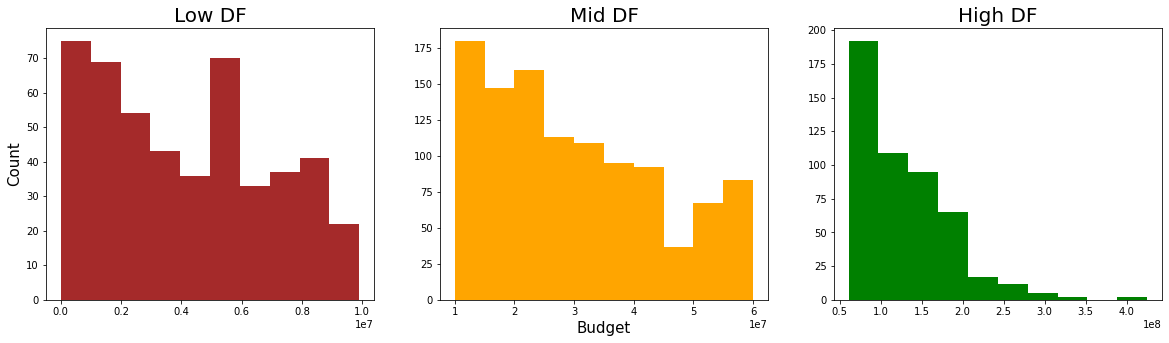

In [65]:
fig, axs = plt.subplots(1,3)
filtered_df_low['production_budget'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['production_budget'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['production_budget'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[0].grid(False)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('Budget',fontsize=15)
axs[1].grid(False)
axs[2].set_title('High DF',fontsize=20);
axs[2].grid(False)
axs[2].set_xticks()

plt.savefig('images/DataFramesThreeBudgets')a

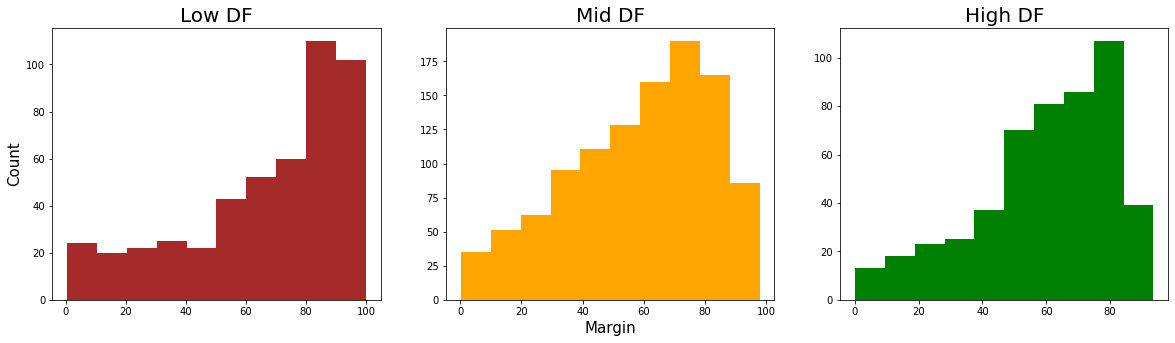

In [74]:
fig, axs = plt.subplots(1,3)
filtered_df_low['prof_margin'].hist(ax=axs[0],figsize=(20,5),color='brown')
filtered_df_mid['prof_margin'].hist(ax=axs[1],figsize=(20,5),color='orange')
filtered_df_high['prof_margin'].hist(ax=axs[2],figsize=(20,5),color='green')
axs[0].set_title('Low DF',fontsize=20)
axs[0].set_ylabel('Count',fontsize=15)
axs[0].grid(False)
axs[1].set_title('Mid DF',fontsize=20)
axs[1].set_xlabel('Margin',fontsize=15)
axs[1].grid(False)
axs[2].set_title('High DF',fontsize=20)
axs[2].grid(False);

These look better, let's look at our correlation statistics across the new datasets.

In [19]:
display(filtered_df_low.corr(), filtered_df_mid.corr(), filtered_df_high.corr())

,production_budget,domestic_gross,worldwide_gross,profit,prof_margin,release_year
production_budget,1.000000,0.250144,0.313380,0.247789,-0.079011,0.069118
domestic_gross,0.250144,1.000000,0.866419,0.865933,0.424852,0.136103
worldwide_gross,0.313380,0.866419,1.000000,0.997665,0.454307,0.113254
profit,0.247789,0.865933,0.997665,1.000000,0.469168,0.110572
prof_margin,-0.079011,0.424852,0.454307,0.469168,1.000000,0.048873
release_year,0.069118,0.136103,0.113254,0.110572,0.048873,1.000000


,production_budget,domestic_gross,worldwide_gross,profit,prof_margin,release_year
production_budget,1.000000,0.350687,0.397395,0.254759,-0.136455,-0.017874
domestic_gross,0.350687,1.000000,0.836966,0.824467,0.537843,0.080703
worldwide_gross,0.397395,0.836966,1.000000,0.988610,0.587384,0.101137
profit,0.254759,0.824467,0.988610,1.000000,0.641357,0.109509
prof_margin,-0.136455,0.537843,0.587384,0.641357,1.000000,0.098864
release_year,-0.017874,0.080703,0.101137,0.109509,0.098864,1.000000


,production_budget,domestic_gross,worldwide_gross,profit,prof_margin,release_year
production_budget,1.000000,0.575702,0.656006,0.541837,0.124071,0.138894
domestic_gross,0.575702,1.000000,0.914936,0.910234,0.617720,0.118566
worldwide_gross,0.656006,0.914936,1.000000,0.989808,0.655650,0.191033
profit,0.541837,0.910234,0.989808,1.000000,0.706711,0.186525
prof_margin,0.124071,0.617720,0.655650,0.706711,1.000000,0.150426
release_year,0.138894,0.118566,0.191033,0.186525,0.150426,1.000000


The only positive Budget-ROI relation appears in the high-budget DF. The Budget-Profit relationship is also highest here.

We will focus on this DF. First a visual of the Budget to ROI, then a look at its statistics.

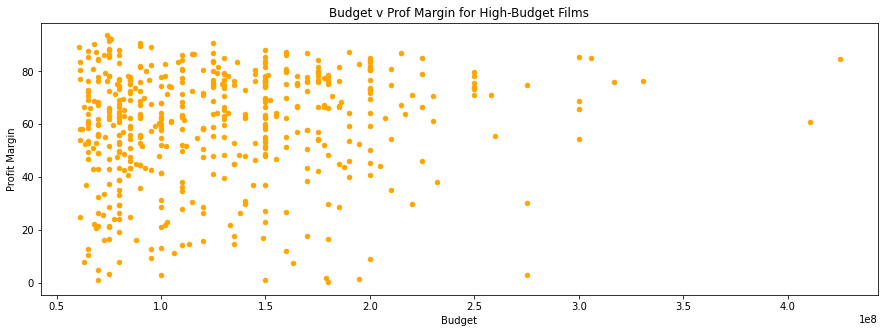

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
filtered_df_high.plot.scatter(x='production_budget',y='prof_margin',title='Budget v Prof Margin for High-Budget Films', ax=ax, c='orange')
ax.set_xlabel('Budget')
ax.set_ylabel('Profit Margin')

plt.savefig('images/budget_v_prof_scatter');

In [21]:
sns.lmplot(x='production_budget',y='prof_margin',data=filtered_df_high);

TypeError: lmplot() got an unexpected keyword argument 'xlabel'

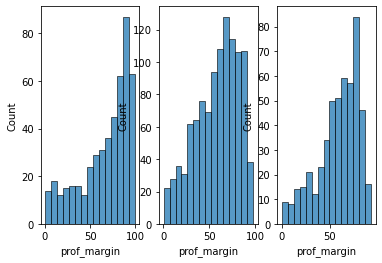

In [46]:
fig, axs = plt.subplots(1,3)
sns.histplot(filtered_df_low, x='prof_margin',bins=15, ax=axs[0])
sns.histplot(filtered_df_mid, x='prof_margin',bins=15, ax=axs[1])
sns.histplot(filtered_df_high, x='prof_margin',bins=15, ax=axs[2])
fig.show();

TypeError: inner() got multiple values for argument 'ax'

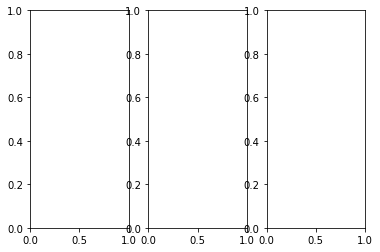

In [56]:
fig, axs = plt.subplots(1,3)

plt.hist(filtered_df_low['prof_margin'],ax=axs[0])
plt.hist(filtered_df_mid['prof_margin'],ax=axs[1])
plt.hist(filtered_df_high['prof_margin'],ax=axs[2])

In [57]:
filtered_df_high.describe()

,production_budget,domestic_gross,worldwide_gross,profit,prof_margin,release_year
count,4.990000e+02,4.990000e+02,4.990000e+02,4.990000e+02,499.000000,499.000000
mean,1.280255e+08,1.568745e+08,4.308491e+08,3.028236e+08,59.581864,2011.961924
std,5.641413e+07,1.225861e+08,3.329539e+08,2.989932e+08,21.167365,4.000069
min,6.072000e+07,7.407000e+04,6.831014e+07,4.778400e+04,0.030000,2005.000000
25%,8.000000e+07,7.338240e+07,1.930509e+08,9.272614e+07,48.155000,2009.000000
50%,1.150000e+08,1.248703e+08,3.283250e+08,1.996808e+08,63.530000,2012.000000
75%,1.600000e+08,2.040989e+08,5.823090e+08,4.393824e+08,76.215000,2015.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,93.620000,2019.000000


## Conclusion ##

Although we can see from the above data that the correlation between Budget and Profit Margin is not very strong, it does still exist.

As part of our recommendations, a budget of $115,000,000 is ideal for maximizing Profit Margin, though there is much more that goes into creating a high-profit movie.